In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [5]:
y_pred = dt_classifier.predict(X_test)


In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")


Model Accuracy: 1.000


In [7]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



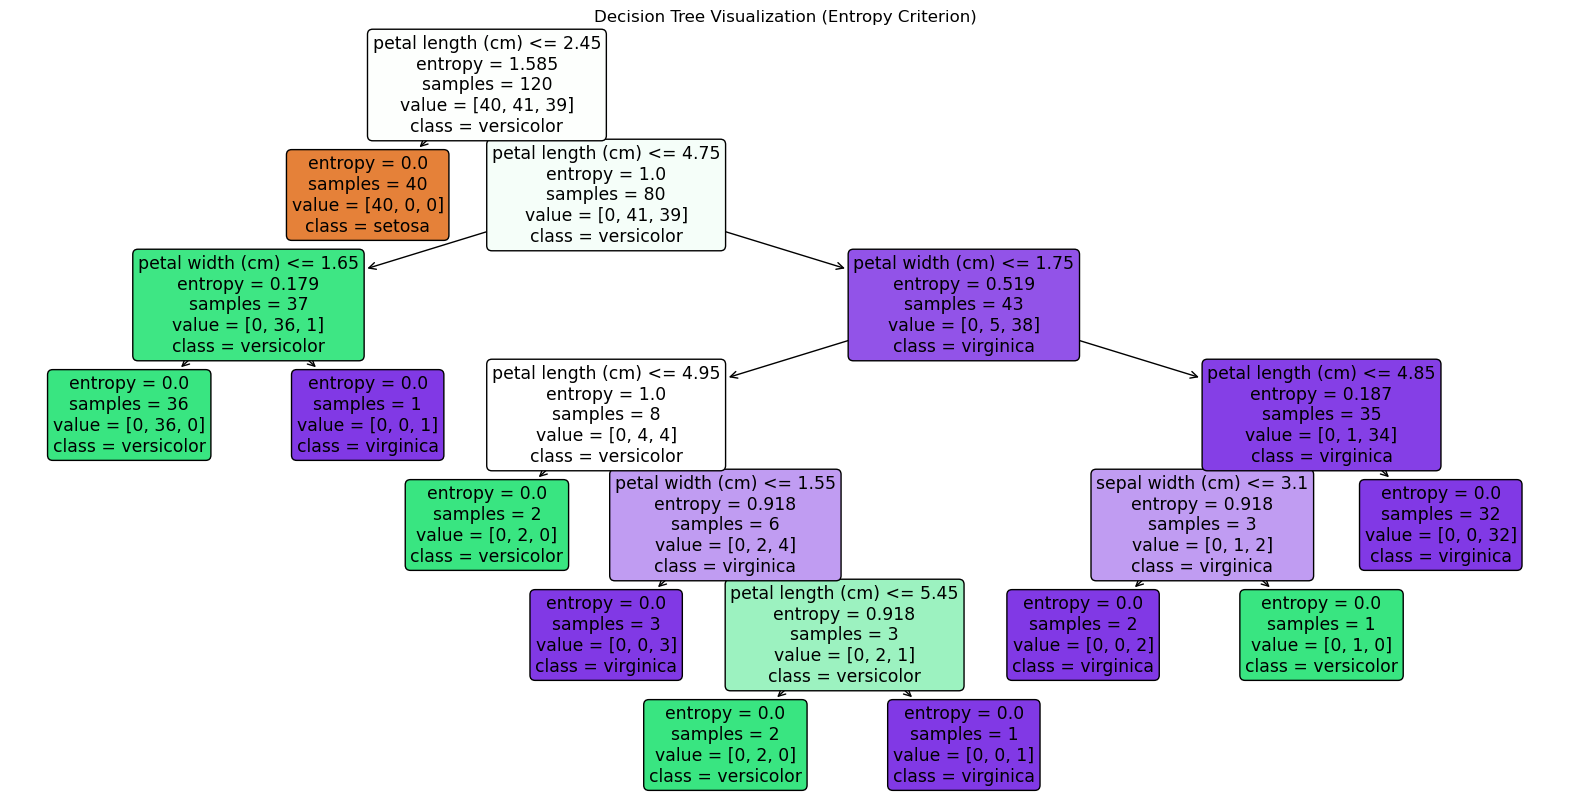

In [8]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization (Entropy Criterion)")
plt.show()

In [9]:
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': dt_classifier.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='importance', ascending=False))


Feature Importance:
             feature  importance
2  petal length (cm)    0.895406
3   petal width (cm)    0.090107
1   sepal width (cm)    0.014487
0  sepal length (cm)    0.000000
